# Hi friends !!!, This project is on Data analytics with Exploratory Data Analysis on the dataset of 'Suicide in India'.
### In this project i will perform all needed process of Data Analytics to get useful Insights and Decisions.¶

In [4]:
#Importing Libraries

import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"D:\Rajan CODE\Data Analysis_EDA\Dataset\Suicides in India 2001-2012.csv",encoding="unicode_escape")
df.head(20) #To Get first 20 Rows Data
df.tail(20) #To Get last 20 Rows Data

,State,Year,Type_code,Type,Gender,Age_group,Total
237499,West Bengal,2012,Professional_Profile,Self-employed (Business activity),Male,60+,0
237500,West Bengal,2012,Professional_Profile,Retired Person,Male,60+,0
237501,West Bengal,2012,Professional_Profile,Unemployed,Male,60+,0
237502,West Bengal,2012,Professional_Profile,House Wife,Male,60+,0
237503,West Bengal,2012,Professional_Profile,Others (Please Specify),Male,60+,0
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0
237508,West Bengal,2012,Professional_Profile,Service (Government),Male,60+,0


# Understanding the Structure of the Dataset¶

In [7]:
#It counts No. of Rows and Columns
df.shape

(237519, 7)

In [8]:
#It gives detailed information about the dataset (column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [9]:
#Checking Null Value, adding sum() will count all null values from each columns
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

# 1. Data Cleaning

In [11]:
#Now I have to Delete that Rows which contains the Null values
df.dropna(inplace=True) #drop null values

In [12]:
# To Rename the Column
df.rename(columns={"Type": "Occupation"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   State       237519 non-null  object
 1   Year        237519 non-null  int64 
 2   Type_code   237519 non-null  object
 3   Occupation  237519 non-null  object
 4   Gender      237519 non-null  object
 5   Age_group   237519 non-null  object
 6   Total       237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [13]:
#Stastistical Summary of the dateset same as summary() function in R

df[['Year', 'Total']].describe() #To get description of specific column
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


# Exploratory Data Analysis

#### Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It is a critical process in data analysis and data science, involving various techniques to understand the structure, patterns, and anomalies in the data. The primary goal of EDA is to understand what the data can tell us beyond formal modeling or hypothesis testing.

### Analyzing which gender tends to commit more suicide?

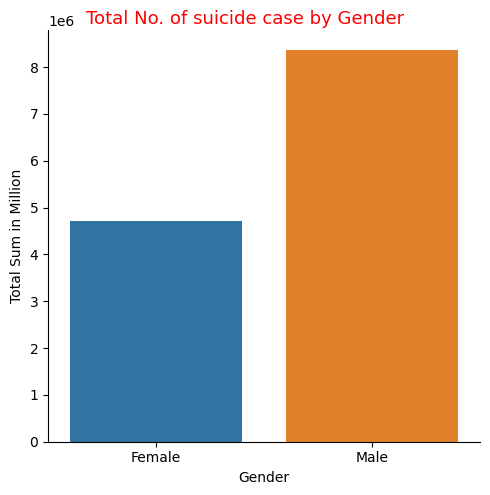

In [16]:
filter_gender = pd.DataFrame(df.groupby("Gender")["Total"].sum()).reset_index()
plot=sns.catplot(x="Gender", y="Total", kind="bar", data=filter_gender,hue="Gender")
plot.set_axis_labels("Gender", "Total Sum in Million")  # Set x and y axis labels
plot.fig.suptitle("Total No. of suicide case by Gender", fontsize=13, color="Red")  # Set plot title
plt.show()

#### By this analysis we have conclude that Males tend to commit more suicides compared to Females in India.

<Figure size 1000x800 with 0 Axes>

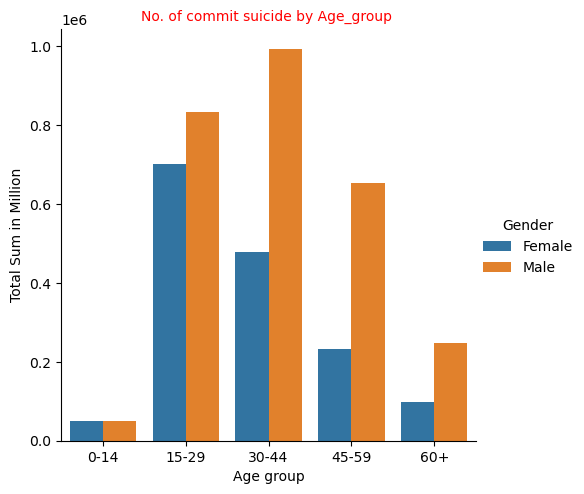

In [18]:
plt.figure(figsize=(10,8))
df= df[df["Age_group"]!="0-100+"]
filter_ageGroup = pd.DataFrame(df.groupby(["Age_group","Gender"])["Total"].sum()).reset_index()
plot=sns.catplot(x="Age_group", y="Total",kind="bar",data=filter_ageGroup,hue="Gender")
plt.title("No. of commit suicide by Age_group ", size=10 ,color="red")
plot.set_axis_labels("Age group", "Total Sum in Million")
plt.show()

#### Above analysis show that male between age group 30-40 commit more suicide
#### And Female between age group 15-29 commit more suicide

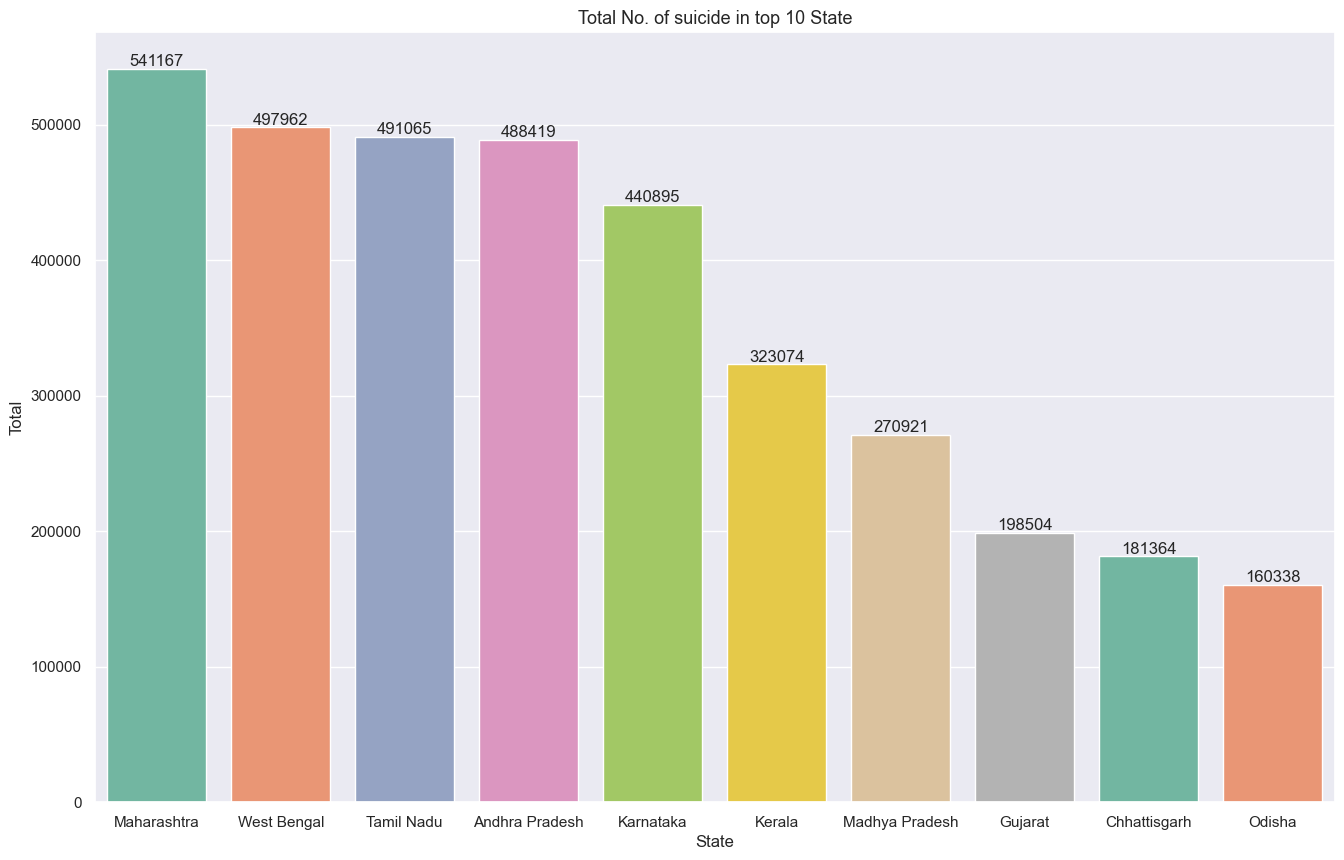

In [20]:
#anlysing states wise Nos. of suicide
df = df[(df["State"]!="Total (States)")&(df["State"]!="Total (Uts)")&(df["State"]!="Total (All India)") ]
state_ord = df.groupby(['State'], as_index = False)['Total'].sum().sort_values(by='Total', ascending = False).head(10)

#figure size is set for Clear Graph (Width,Height)
sns.set(rc={'figure.figsize':(16,10)})
x=sns.barplot(x='State', y='Total', data = state_ord,hue="State",palette="Set2")
plt.title("Total No. of suicide in top 10 State", fontsize=13)
for bars in x.containers:
    x.bar_label(bars)
plt.show()

#### According to the analysis above, the highest number of suicides are committed by people from "Maharashtra."
#### and there are five city (Mahasatra, West Bengal, Tamil Nadu, Andhra Pradesh) where highest number of people are committed suicides.

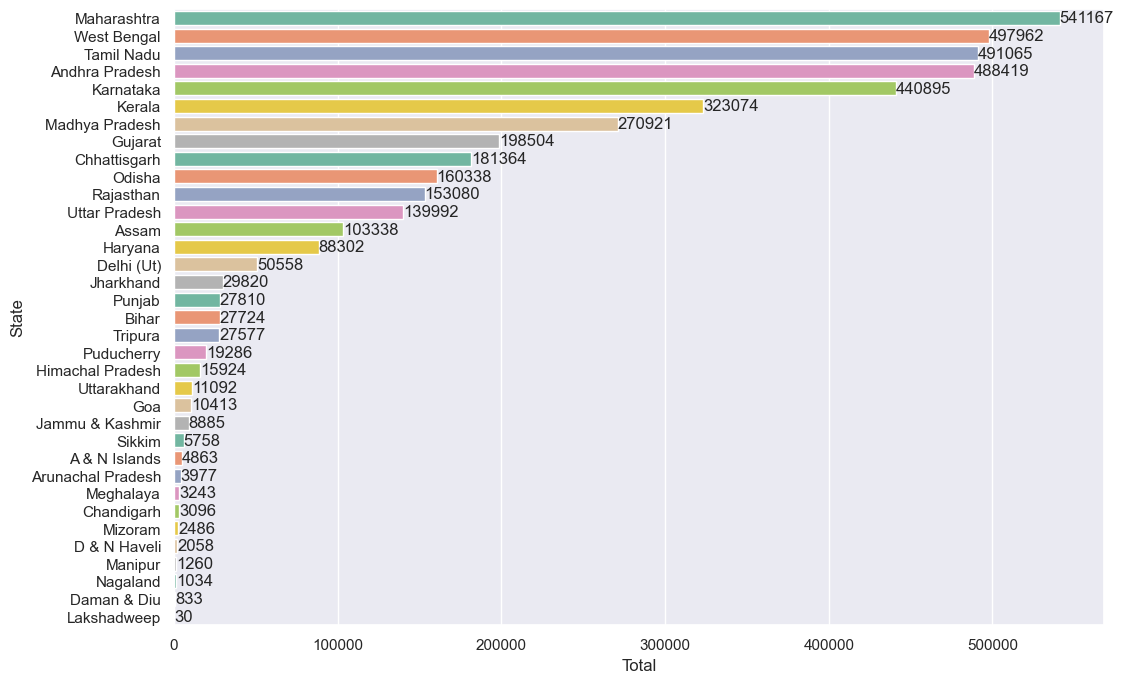

In [22]:
plt.figure(figsize=(12,8))
filter_state = pd.DataFrame(df.groupby(["State"])["Total"].sum()).reset_index().sort_values(by='Total', ascending = False)
x=sns.barplot(y = 'State', x = 'Total',data = filter_state,hue="State", edgecolor = 'w',palette="Set2")
for bars in x.containers:
    x.bar_label(bars)
plt.show()

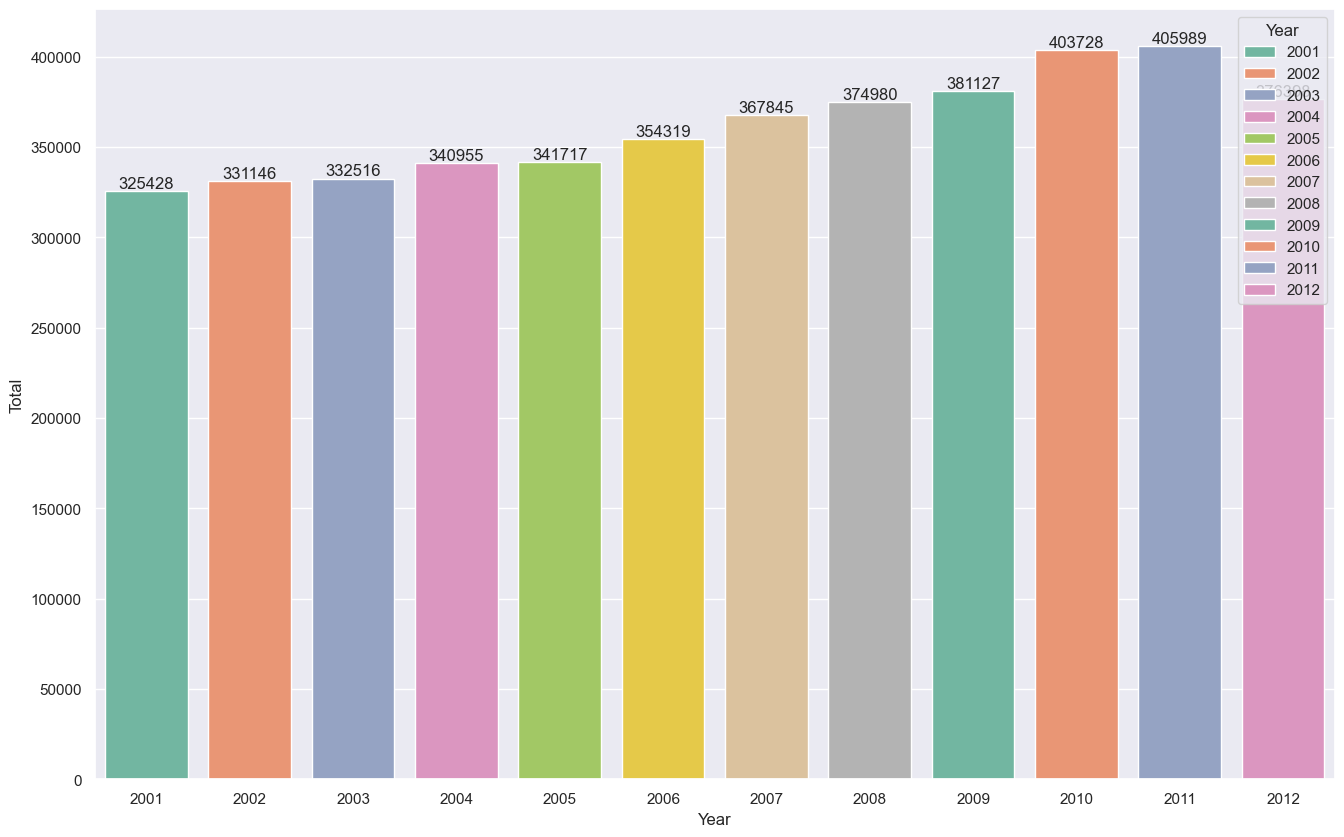

In [23]:
# anlysing Suicide year wise from 2001-2012
Yr = df.groupby(['Year'], as_index = False)['Total'].sum().sort_values(by='Total', ascending = False).head(12)

#figure size is set for Clear Graph (Width,Height)
sns.set(rc={'figure.figsize':(16,10)})
x=sns.barplot(x='Year', y='Total', data = Yr, palette="Set2",hue="Year")
for bars in x.containers:
    x.bar_label(bars)
plt.show()

#### According to the analysis above, the highest number of suicides are committed in year 2010 and 2011

<Figure size 900x600 with 0 Axes>

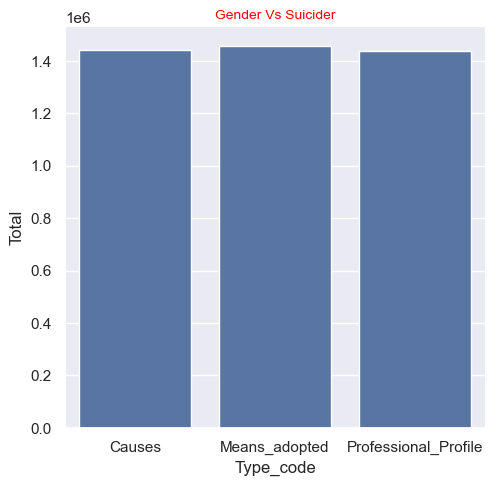

In [25]:
plt.figure(figsize=(9,6))
filter_type=df.groupby(["Type_code"], as_index=False)["Total"].sum().reset_index()
ab=sns.catplot(x="Type_code", y="Total",kind="bar",data=filter_type)
plt.title("Gender Vs Suicider", size=10 ,color="red")
plt.show()

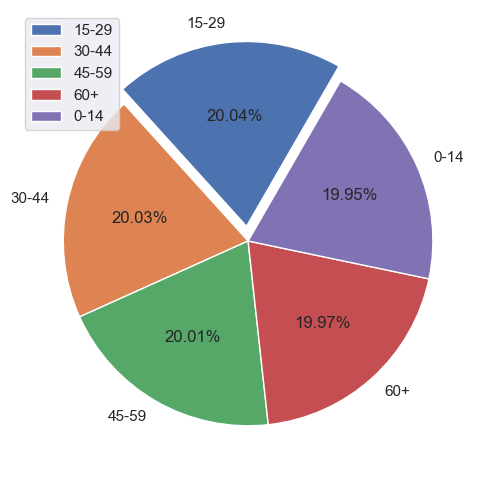

In [26]:
plt.figure(figsize=(6,6))
x=df["Age_group"].value_counts().index
y=df["Age_group"].value_counts().values
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%",explode=(0.08,0,0,0,0))
plt.legend(loc="upper left")
plt.show()

### People committed suicide from 2001-12

Total cases from 2001-12: 
 Year
2001    325428
2002    331146
2003    332516
2004    340955
2005    341717
2006    354319
2007    367845
2008    374980
2009    381127
2010    403728
2011    405989
2012    376398
Name: Total, dtype: int64


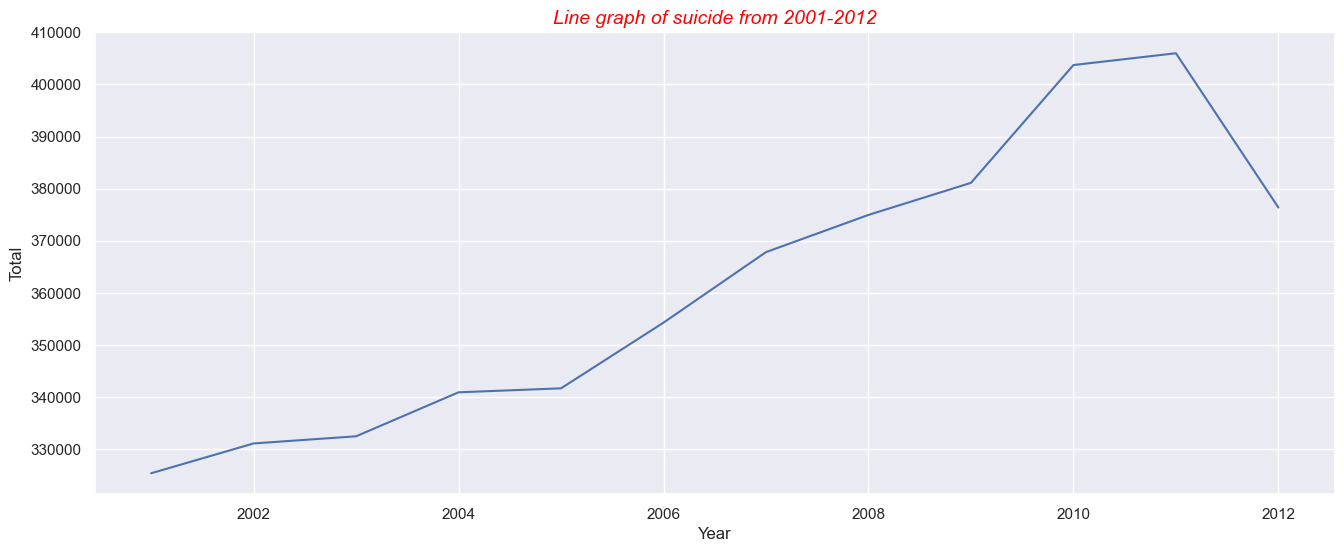

In [28]:
#anlysing total suicide from 2001-2012 by Bar Plot
print("Total cases from 2001-12: \n",df.groupby("Year")["Total"].sum())

state_ord = df.groupby(['Year'], as_index = False)['Total'].sum().sort_values(by='Total', ascending = False)

#figure size is set for Clear Graph (Width,Height)
plt.figure(figsize=(16,6))
x=sns.lineplot(x='Year', y='Total', data = state_ord)
plt.title("Line graph of suicide from 2001-2012", color="Red",fontsize=14, fontstyle='italic')
plt.show()

Text(0, 0.5, 'Total Suicide')

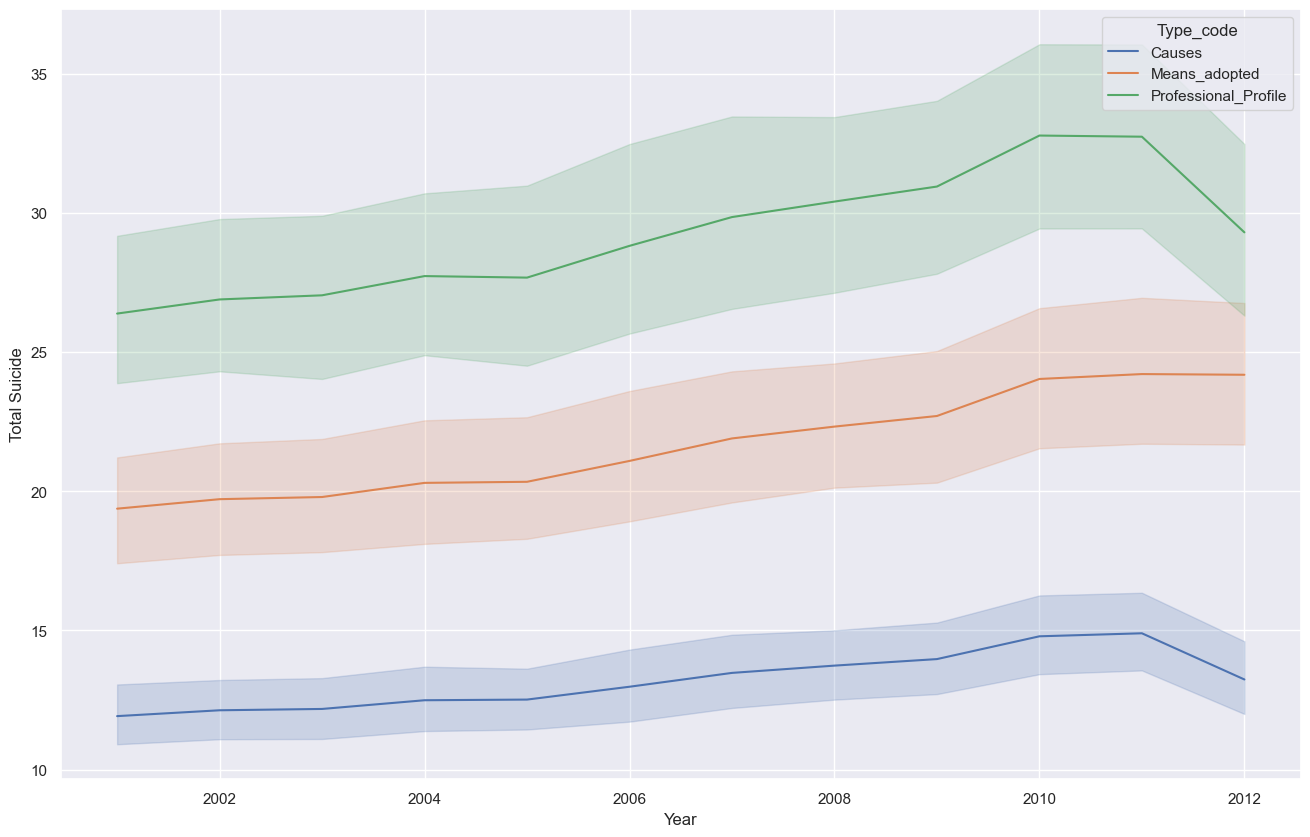

In [29]:
sns.lineplot(x="Year", y="Total", data=df, hue="Type_code")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Suicide", fontsize=12)

In [30]:
#Remove rows with value as Total (States), Total (All India) or Total (Uts)
df = df[(df["State"]!="Total (States)")&(df["State"]!="Total (Uts)")&(df["State"]!="Total (All India)") ]

In [31]:
df["State"].value_counts()

State
Karnataka            6480
Madhya Pradesh       6480
Maharashtra          6480
Andhra Pradesh       6479
Odisha               6479
Rajasthan            6479
Chhattisgarh         6478
Bihar                6478
Haryana              6478
Kerala               6476
Uttar Pradesh        6475
Tamil Nadu           6474
Gujarat              6474
Assam                6474
Jharkhand            6473
Tripura              6470
Delhi (Ut)           6470
West Bengal          6468
Punjab               6467
Himachal Pradesh     6462
Jammu & Kashmir      6449
Goa                  6447
Uttarakhand          6446
Sikkim               6430
Mizoram              6425
Meghalaya            6421
Puducherry           6418
Chandigarh           6405
A & N Islands        6400
Daman & Diu          6398
Arunachal Pradesh    6395
Nagaland             6393
D & N Haveli         6392
Manipur              6388
Lakshadweep          6362
Name: count, dtype: int64

### Number of cases changed over time

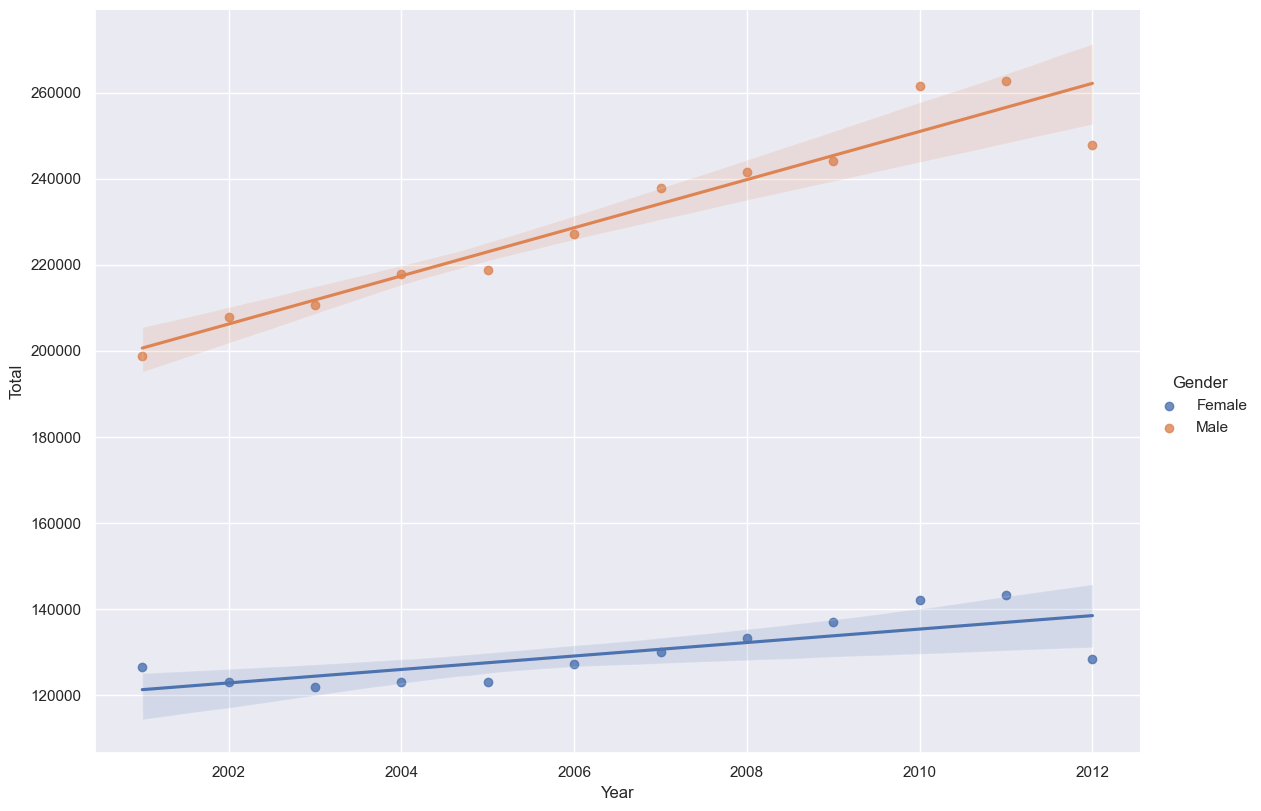

In [33]:
grouped_year = df.groupby(["Year","Gender"])["Total"].sum()
grouped_year = pd.DataFrame(grouped_year).reset_index()
# grouped_year
sns.lmplot(x="Year", y="Total", hue="Gender", data=grouped_year,height=8.27, aspect=11.7/8.27);

### Which social issues causes more suicides

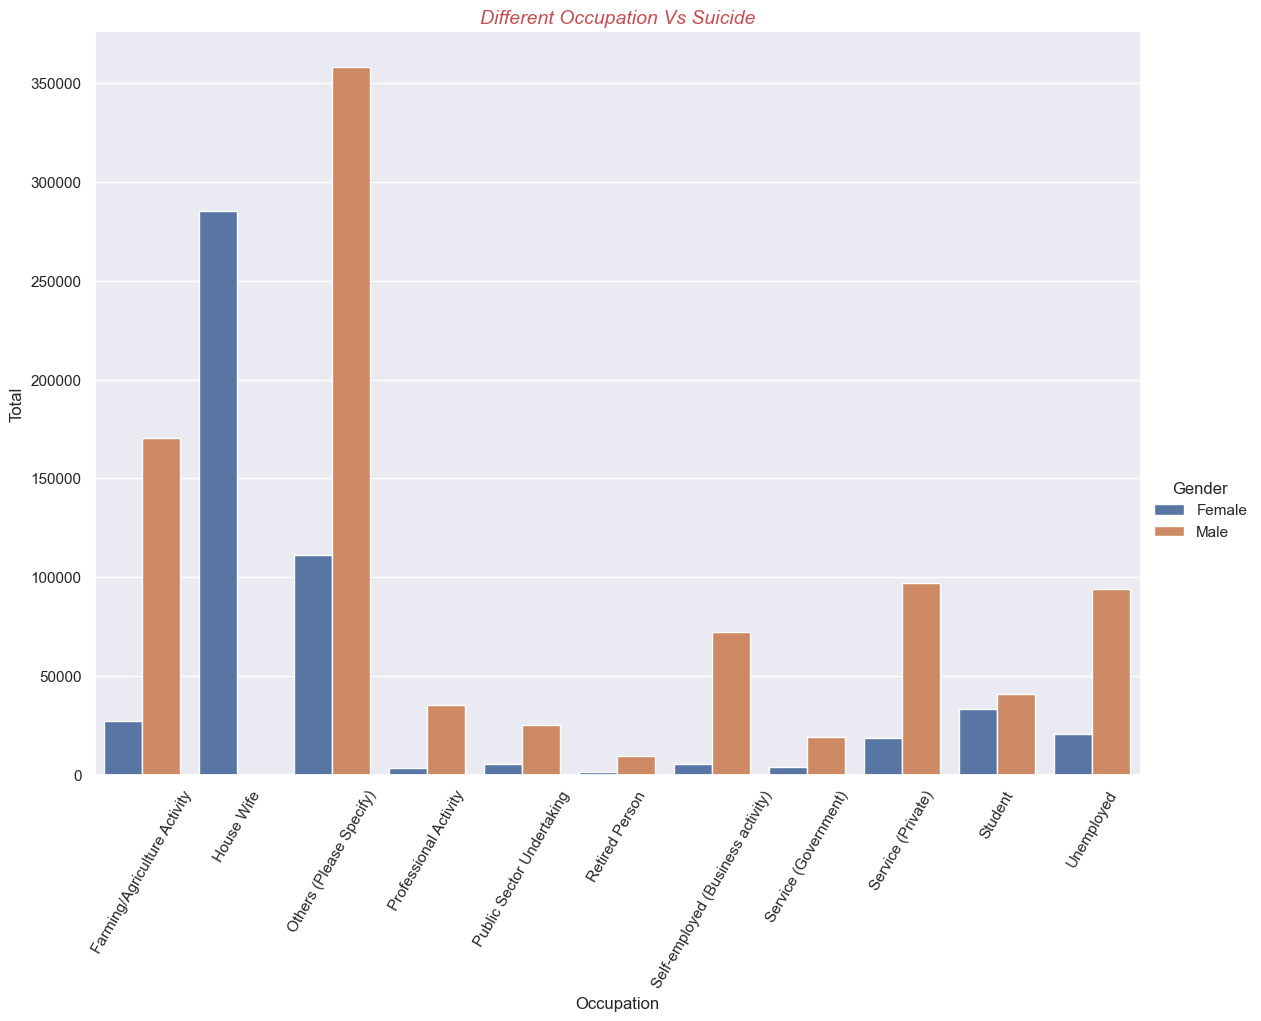

In [80]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Professional_Profile"].groupby(["Occupation","Gender"])["Total"].sum()).reset_index()
ab=sns.catplot(x="Occupation", y="Total",hue="Gender", kind="bar",data=filter_social_status,height=8.27, aspect=11.7/8.27);
ab.set_xticklabels(rotation=60)
plt.title("Different Occupation Vs Suicide", color="r", fontsize=14,fontstyle="italic")
plt.show()

#### According to the above analysis, Married Male who have Social Issue commit more suicide

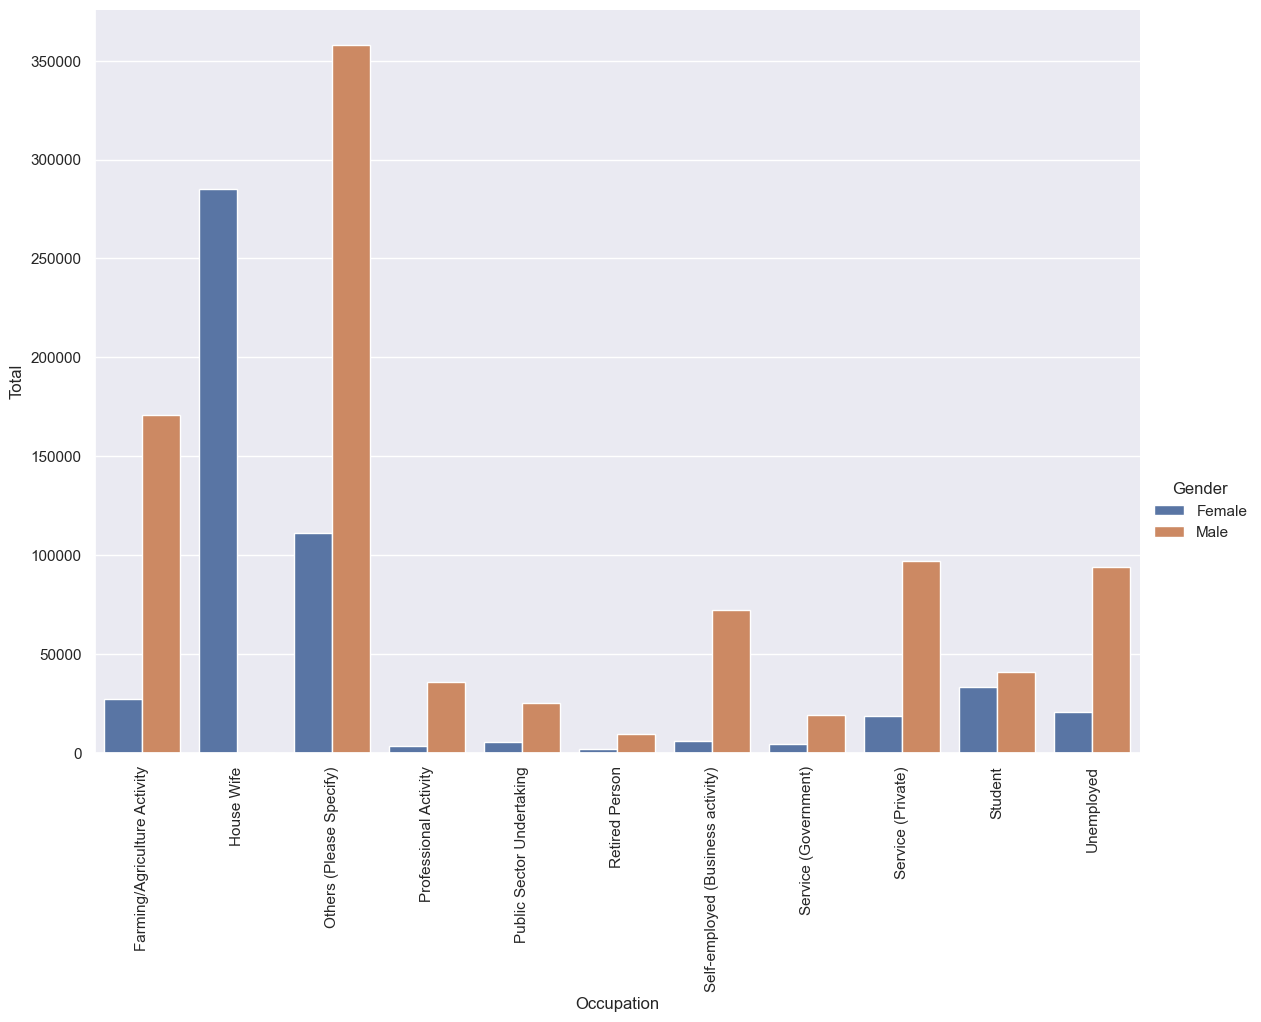

In [37]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Professional_Profile"].groupby(["Occupation","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Occupation", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)
plt.show()

#### It appears from above visuliazation people with "Middle" & "Primary" education tend to commit more suicide.

#### People with Diploma and Graduate tend to commit least no. of suicide

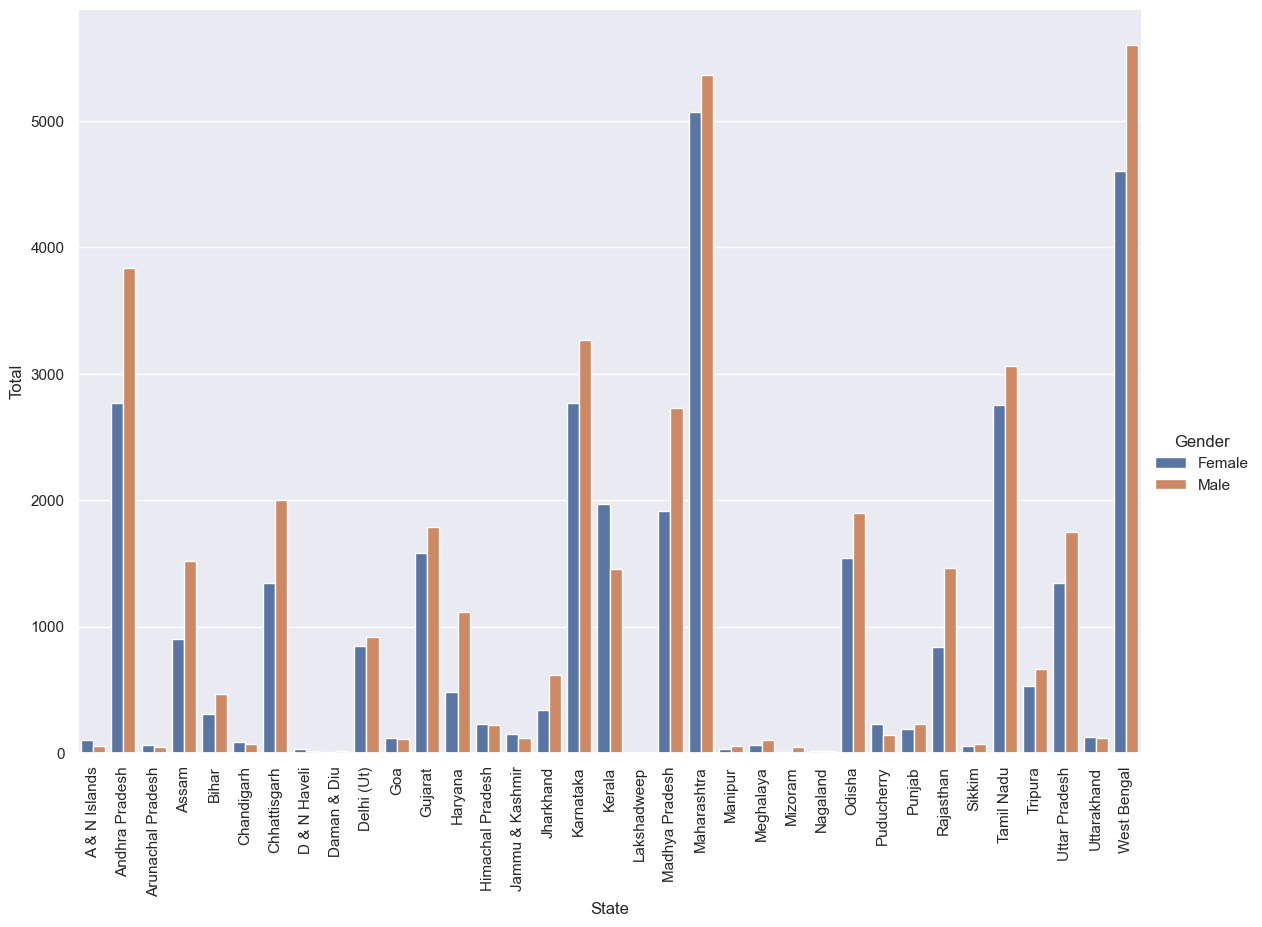

In [39]:
filter_social_status = pd.DataFrame(df[df["Occupation"]=="Student"].groupby(["State","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="State", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)
plt.show()

#### Above visuliation show that highest No. of Student commit suicide in West Bengal and Maharastra

## Conclusion¶
#### 1. Males tend to commit more suicides compared to Females in India
#### 2. Highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu.
#### 3. Male might commit more suicide compared to females in the future if this trend continues.
#### 4. People who commit suicide are mostly:
####    i Married
####    ii Farmers and housewives
####    iii Youngsters (15-29 age) and middle age (30-44)